<a href="https://colab.research.google.com/github/kozz84/Udemy/blob/main/Machine_Learning_A_Z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRO

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z/Part 1 - Data Preprocessing/Section 2 -------------------- Part 1 - Data Preprocessing --------------------/Python/Data.csv')

In [ ]:
#x = df.drop('Purchased', axis=1)
#x = df.iloc[:,0:3].values

x = df.iloc[:,:-1].values

np.nanmean(x[:,2],dtype='float32')

63777.777

In [ ]:
y = x = df.iloc[:,-1].values

In [ ]:
null_data = df[df.isnull().any(axis=1)]

In [ ]:
from sklearn.impute import SimpleImputer
sp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
sp.fit(x[:,1:3])

SimpleImputer()

In [ ]:
x[:,1:3]=sp.transform(x[:,1:3])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0] )],remainder='passthrough')

In [ ]:
ct.fit(x)

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder', OneHotEncoder(), [0])])

In [ ]:
x = ct.transform(x)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
y=le.fit_transform(y)

In [ ]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train[:,3:])

StandardScaler()

In [ ]:
X_train[:,3:] = scaler.transform(X_train[:,3:])
X_train

array([[1.0, 0.0, 0.0, 0.9518263102018367, 0.9861483149559838],
       [0.0, 1.0, 0.0, 0.2630675731713777, 0.12381477472917465],
       [1.0, 0.0, 0.0, -0.253501479601474, 0.46175623287088036],
       [0.0, 0.0, 1.0, -0.08131179534386676, -0.1675141687344727],
       [1.0, 0.0, 0.0, -0.5978808481166885, -0.48214945028445844],
       [1.0, 0.0, 0.0, 1.6405850472322658, 1.7202971168288956],
       [0.0, 0.0, 1.0, 0.05261351463427554, -1.1114198518898115],
       [0.0, 0.0, 1.0, -1.9753983221776066, -1.530933452960047]],
      dtype=object)

In [ ]:
X_test = scaler.transform(X_test[:,3:])

# Linear Reg

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z/Part 2 - Regression/Section 4 - Simple Linear Regression/Python/Salary_Data.csv')

In [ ]:
df.head(1)

,YearsExperience,Salary
0,1.1,39343.0


In [ ]:
X= df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lm.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

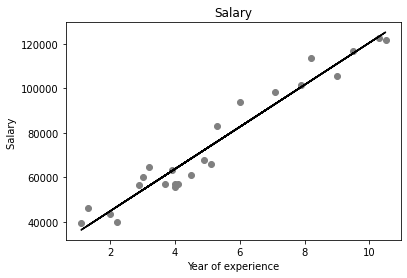

In [ ]:
plt.scatter(X_train, y_train, color='gray')
plt.plot(X_train, lm.predict(X_train),color='black')
plt.title('Salary')
plt.xlabel('Year of experience')
plt.ylabel('Salary ')
plt.show()

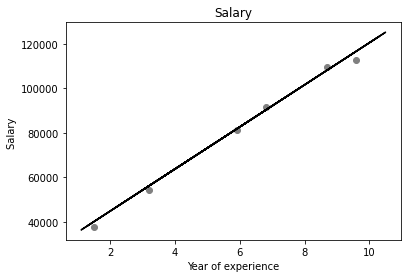

In [ ]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_train, lm.predict(X_train),color='black')
plt.title('Salary')
plt.xlabel('Year of experience')
plt.ylabel('Salary ')
plt.show()

In [ ]:
lm.predict([[5]])

array([73242.38682565])

In [ ]:
print(lm.coef_)
print(lm.intercept_)

[9440.46383365]
26040.067657420906


# Multi linear

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [143]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z/Part 2 - Regression/Section 5 - Multiple Linear Regression/Python/50_Startups.csv')

In [144]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [145]:
df.head(1)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.8,471784.1,New York,192261.83


In [146]:
X= df.drop(['Profit','State'],axis=1)
y = df['Profit']
States_dummies = pd.get_dummies(df['State'],drop_first=True)
X= pd.concat([X,States_dummies], axis=1)
X = X.values
y = y.values


In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [149]:
pred = [160000,130000,300000,0,0]

In [150]:
lm.fit(X_train,y_train)

LinearRegression()

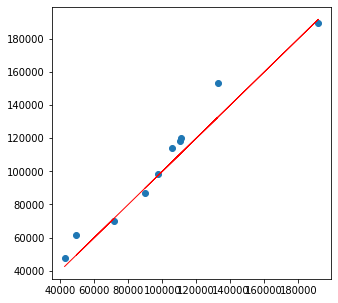

In [151]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test, color='red', linewidth=1)
plt.show()

In [157]:
print(lm.predict([[160000, 130000, 300000,0,0]]))

[182377.68153823]


In [105]:
from sklearn import metrics

In [106]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

6066.865715986147
66241729.62479818
8138.902237083216


In [107]:
X= df.drop(['Profit'],axis=1)
y = df['Profit']

In [108]:
States_dummies = pd.get_dummies(df['State'])

In [109]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),['State'])],remainder='passthrough')

In [110]:
X = ct.fit_transform(X)

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [119]:
lm.fit(X_train,y_train)
X_train[0]

array([1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 7.8013110e+04,
       1.2159755e+05, 2.6434606e+05])

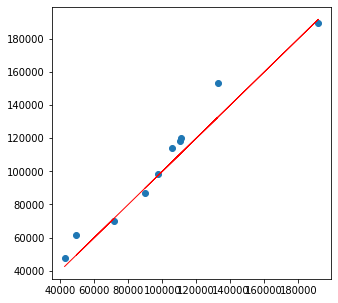

In [114]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test, color='red', linewidth=1)
plt.show()

In [115]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

7068.317931582249
83628721.142752
9144.874036461739
